* Convergence of Time series

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
class diff_eqt:
    def __init__(self,initial = None,param=None):
        if type(initial) == list:
            self.seq = initial
        else:
            self.seq = [initial]
        self.param = param
        self.order = len(self.seq)
        self.rand_seq = None
        
    def get_seq(self,t):
        while t>self.order:
            t -= 1
            y_t = self.param[0]
            for i in range(1,self.order+1):
                y_t += self.seq[-i] * self.param[i]
            y_t += self.param[0]
            self.seq.append(y_t)
        return self.seq
    
    def get_seq_rand(self,t):
        e_t = np.random.randn(t)
        self.rand_seq = self.seq + e_t
        return self.rand_seq
    
    def get_param(self):
        return self.param

    def get_eqt(self):
        if self.param != 0:
            y_t = "y_t = "
        else:
            y_t = "y_t = " + str(self.param[0])
        for i in range(1,self.order+1):
            if self.param[i] == 0:
                continue
            t_i = 't-{}'.format(i)
            a =  str(self.param[i]) + "*" + ('y_{'+t_i+'}')
            if self.param[i] <0:
                y_t += a
            if self.param[i]>0:
                y_t += "+" + a
        return y_t

In [37]:
y_t = diff_eqt(initial = [1,1],param = [0,1.2,-1.5])

In [38]:
y_t.get_eqt()

'y_t = +1.2*y_{t-1}-1.5*y_{t-2}'

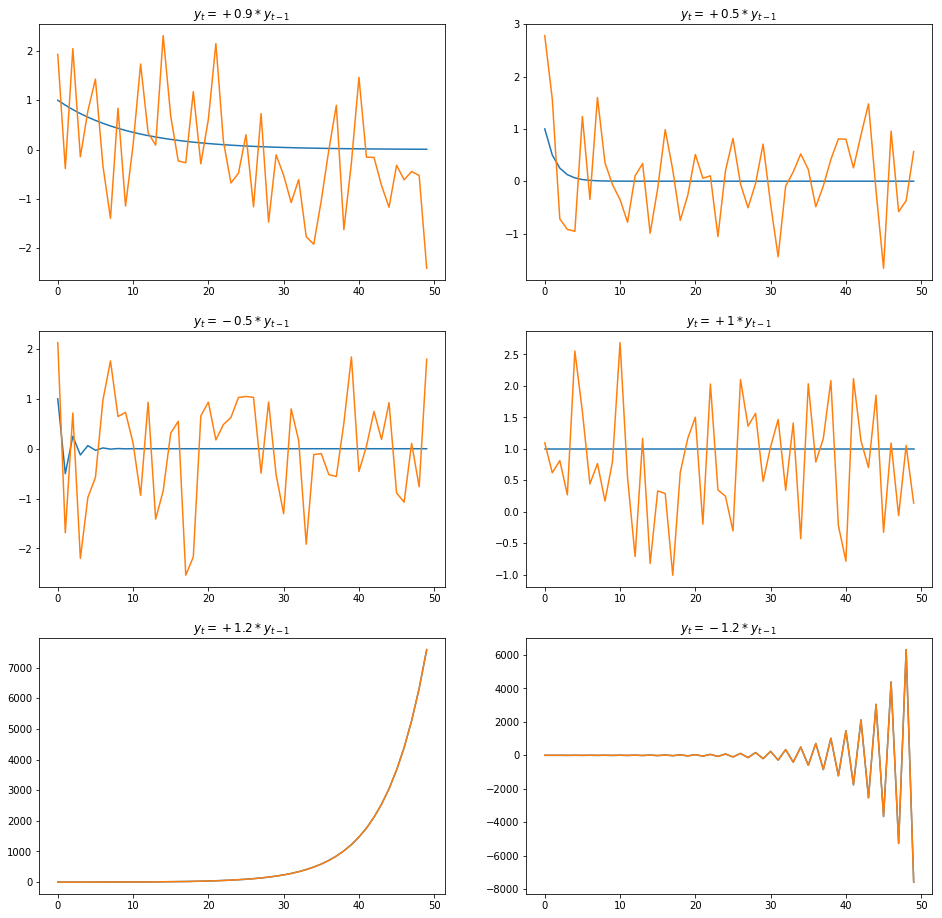

In [43]:
initial = 1
param = [[0,0.9],[0,0.5],[0,-0.5],[0,1],[0,1.2],[0,-1.2]]
axis = [0,0,1,1,2,2]
fig,axes = plt.subplots(3,2,figsize = (16,16))
for par in range(len(param)):
    y_t = diff_eqt(initial,param[par])
    seq = y_t.get_seq(50)
    ran_seq = y_t.get_seq_rand(50)
    axes[axis[par],par%2].plot(seq)
    axes[axis[par],par%2].plot(ran_seq)
    axes[axis[par],par%2].set_title(r"${}$".format(y_t.get_eqt()))

In [18]:
print(r"$y=x$")

$y=x$
